In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/forest-fires-in-brazil/amazon.csv


In [2]:
file = r'/input/forest-fires-in-brazil/amazon.csv'
data = pd.read_csv(file)

In [3]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


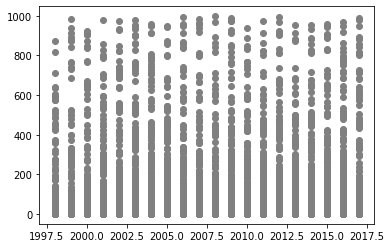

In [4]:
plt.scatter(data.year, data.number, color = 'gray')

In [5]:
group_year = data['number'].groupby(data['year'])
group_year.sum()

year
1998    20013.971
1999    26882.821
2000    27351.251
2001    29071.612
2002    37390.600
2003    42760.674
2004    38453.163
2005    35004.965
2006    33832.161
2007    33037.413
2008    29378.964
2009    39117.178
2010    37037.449
2011    34633.545
2012    40084.860
2013    35146.118
2014    39621.183
2015    41208.292
2016    42212.229
2017    36685.624
Name: number, dtype: float64

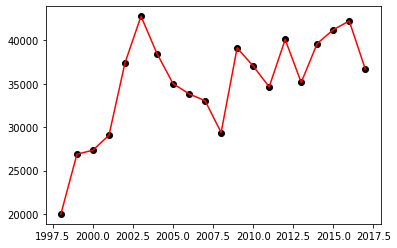

In [6]:
plt.scatter(data['year'].drop_duplicates(keep = 'first'), 
            group_year.sum(),
            color = 'black')

plt.plot(data['year'].drop_duplicates(keep = 'first'), 
            group_year.sum(),
            color = 'red')

According the figure:

    1. 2008, the fires is least, and 2003, the fires is most
    
    2. the basic trend is still increase

In [7]:
group_month = data['number'].groupby(data['month'])
group_month.sum()

month
Abril        28188.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30848.050
Janeiro      47747.844
Julho        92326.113
Junho        56010.675
Maio         34731.363
Mar�o        30717.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64

In [9]:
group_state = data['number'].groupby(data['state'])
group_state.sum()

state
Acre                18464.030
Alagoas              4644.000
Amapa               21831.576
Amazonas            30650.129
Bahia               44746.226
Ceara               30428.063
Distrito Federal     3561.000
Espirito Santo       6546.000
Goias               37695.520
Maranhao            25129.131
Mato Grosso         96246.028
Minas Gerais        37475.258
Paraiba             52435.918
Par�                24512.144
Pernambuco          24498.000
Piau                37803.747
Rio                 45160.865
Rondonia            20285.429
Roraima             24385.074
Santa Catarina      24359.852
Sao Paulo           51121.198
Sergipe              3237.000
Tocantins           33707.885
Name: number, dtype: float64

In [10]:
data_state = group_state.sum()

In [11]:
other = data_state[data_state < 40000].sum()
other = pd.Series(other, index = ['other'])
total = data_state[data_state >= 40000]

total

state
Bahia          44746.226
Mato Grosso    96246.028
Paraiba        52435.918
Rio            45160.865
Sao Paulo      51121.198
Name: number, dtype: float64

([<matplotlib.patches.Wedge at 0x7ff9e8376e90>,
 [Text(0.9730274297390997, 0.5130473866762421, ''),
  Text(-0.4718506787301116, 0.9936583602938855, ''),
  Text(-0.9732277093697105, -0.512667363614056, ''),
  Text(-0.030390837263149253, -1.0995801003157728, ''),
  Text(0.9352650271605627, -0.5790330983375233, '')])

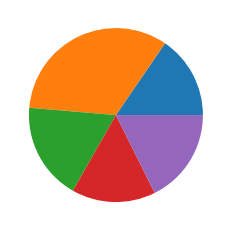

In [12]:
plt.pie(total)